<< 사이킷런 프로그램 설치, 데이터 로드 방법 , 데이터 확인 >>

In [1]:
#!pip install -U scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)

1.3.2


In [3]:
#1 사이킷런 데이터 임포트
from sklearn import datasets

In [4]:
#2 아이리스 데이터 셋 (붓꽃 데이터 셋 = 분류)
from sklearn.datasets import load_iris
iris = load_iris() #(data X, target Y)
x,y= iris.data,iris.target


In [5]:
#3 보스턴 주택 데이터 셋 (회귀 문제 사용)
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
#4 손글씨 숫자 데이터 셋 (이미지 분류 사용)
digits = sklearn.datasets.load_digits()
x,y = digits.data , digits.target

### 데이터와 레이블 사용
- x : 특성(Feature)을 나타내는 배열 = 독립변수 / 특성 / 입력 /설명
- y : 레이블(Label) 또는 타켓(Target)을 나타내는 배열 = 종속변수 / 라벨 / 출력 / 클래스

### 데이터셋 구조
- 사이킷런은 일반적으로 'Bunch' 객체로 제공, 아래와 같은 키값이 있다.
- data(샘플데이터 배열) , target(레이블 데이터 포함 배열) , feature_names(특성이름이 포함된 배열) , target_name(타켓이름이 포함된 배열) , DESCR : 데이터셋에 대한 설명

### 사이킷런 0.24부터 일부 데이터셋을 sklearn.datasets.fetch_openml로 호출해서 사용

In [7]:
#5 손글씨 숫자 데이터 셋 (이미지 분류 사용) sklearn.datasets.fetch_openml 로 다운로드 받아 보자
from sklearn.datasets import fetch_openml
#mnist = fetch_openml(data_id=784, parser="auto")
mnist = fetch_openml(name = 'mnist_784', parser="auto",data_home='./data/') #https://www.openml.org/
x,y = mnist.data , mnist.target
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#import ssl
#dir(ssl)
#ssl._create_default_https_context = ssl._create_unverified_context #인증 검증 비활성화

In [9]:
#6 load_*() 함수를 통해 데이터를 메모리에 저장한 것을 디스크에 저장하고 싶다

#로드된 데이터를 파일로 저장하고 싶다 -> 판다스를 활용해서 csv로 저장
from sklearn.datasets import load_iris
iris = load_iris() #(data X, target Y)
iris_df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
iris_df['target'] = iris.target

iris_df.to_csv('./data/iris.csv' , index = False)

### 생각해보자. iris_df로 만든 이후 작업
1.데이터 탐색 및 분석 : 기초 통계 분석,데이터 확인    

2.데이터 시각화 : seaborn을 활용해서 특성 간 상관관계, 특성 분포 시각화(히스토그램 ,박스플랏)  

3.머신러닝 모델 구축평가 : 데이터 분할(훈련,테스트) sklearn.model_selection.train_test_split
                         , 모델 훈련 및 예측(로지스틱회귀를 사용해서 붓꽃의 종류 분류) sklearn.linear_model.LogisticRegression
                         , 모델평가 sklearn.metrics.*
                         
4.고급분석 : 다변량 분석(특성간의 상호작용분석) , k평균 알고리즘등을 사용해서 클러스터로 그룹화등

### 고급분석이란? 주요데이터 복잡한 패턴 및 특징을 파악

1.예측분석 : 데이터를 기반으로 미래의 사건이나 결과를 예측하는 것
             회귀분석,시계열 분석,머신러닝 모델등 (판매에측 , 재고관리 , 수요예측 등)
             
2.기술분석 : 데이터를 분석해서 주요 추세와 패턴을 파악하는 것
             클러스터링,주성분 분석(PCA),데이터 시각화 등
             (고객 세분화,시장추세 분석)

3.처리분석 : 여러 시나리오를 고려해서 최적의 행동이나 결정을 추천시키는 것
             최적화 알고리즘, 시뮬레이션, 이벤트 처리결과 등
             (위험관리 , 공급망 최적화 등)
             
4.인과분석 : 원인과 결과를 분석 하는 것
             실험설계,인과 추론 모델등          
             (마켓팅 캠페인 효과 분석, 정책 변화의 영향 평가)
             
5.감성분석 : 텍스트 데이터를 분석하여 사람들의 감정이나 태도를 파악하는 것
             자연어 처리(NLP),텍스트 마이닝
             (소셜 미디어 감성분석,제품 리뷰 분석)

실습 문제

1. 사이킷런 데이터셋 로드 :사이킷런의 datasets 모듈을 사용하여 load_wine 데이터셋을 로드하고, 데이터셋의 기본 정보를 출력하는 코드를 작성합니다. 

2.로드한 wine 데이터셋의 특성(feature)과 타겟(target)의 크기(shape)를 확인하고 출력하는 코드를 작성합니다. 

3.wine 데이터셋의 특성 이름과 타겟 이름을 출력하는 코드를 작성합니다.  

4. wine 데이터셋의 첫 번째 두 특성을 사용하여 산점도(scatter plot)를 그리는 코드를 작성하세요. 여기서 x축은 첫 번째 특성, y축은 두 번째 특성으로 설정합니다.  matplotlib의 scatter  

5. wine 데이터셋을 훈련 세트와 테스트 세트로 분할하는 코드를 작성합니다. (테스트 세트의 비율을 30%로 설정)
sklearn.model_selection.train_test_split()사용
    
6. EDA 확인  
 6-1 데이터 탐색 (Exploratory Data Analysis - EDA)
 - 기술통계: X_train과 y_train의 기술통계를 확인하여 데이터의 중심 경향, 분포, 이상치 등을 파악
 - 시각화: 히스토그램, 박스플롯, 산점도 행렬 등을 사용하여 데이터의 분포와 특성 간의 관계를 시각적으로 파악
 - 상관분석: 특성 간의 상관계수를 계산하여 변수 간의 관계를 파악
 
 6-2 데이터 전처리 (Data Preprocessing)
- 결측치 처리: 결측치가 있는 경우 적절한 방법(삭제, 평균값 대체 등)으로 처리
- 특성 스케일링: 표준화(Standardization) 또는 정규화(Normalization)를 적용하여 다른 스케일의 특성들을 일관된 범위로 조정
- 범주형 데이터 처리: 원-핫 인코딩(One-Hot Encoding)이나 레이블 인코딩(Label Encoding)을 통해 범주형 데이터를 수치형으로 변환
- 특성 선택 및 추출: 모델의 성능에 영향을 미치지 않는 특성을 제거하거나, 차원 축소 기법을 적용

7. 모델 선택 및 학습 (Model Selection and Training)
- 모델 선택: 문제에 적합한 머신러닝 모델을 선택 (분류 문제의 경우 로지스틱 회귀, 결정 트리, 랜덤 포레스트 등)
- 교차 검증: 훈련 데이터에 대해 교차 검증을 수행하여 모델의 성능을 평가
- 하이퍼파라미터 튜닝: 그리드 서치(Grid Search), 랜덤 서치(Random Search) 등을 사용하여 최적의 하이퍼파라미터를 찾는다
- 모델 학습: 최종적으로 선택된 하이퍼파라미터로 훈련 데이터셋에 모델학습

8. 모델 평가  
- 성능 평가: 테스트 데이터셋에 대해 모델을 평가하고, 성능 지표(정확도, 정밀도, 재현율, F1 점수 등)를 계산.
- 혼동 행렬: 분류 문제의 경우, 혼동 행렬(Confusion Matrix)을 생성하여 모델의 성능을 더 자세히 분석.

9. 결과 해석 및 보고 (Interpretation and Reporting)

10. 배포

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

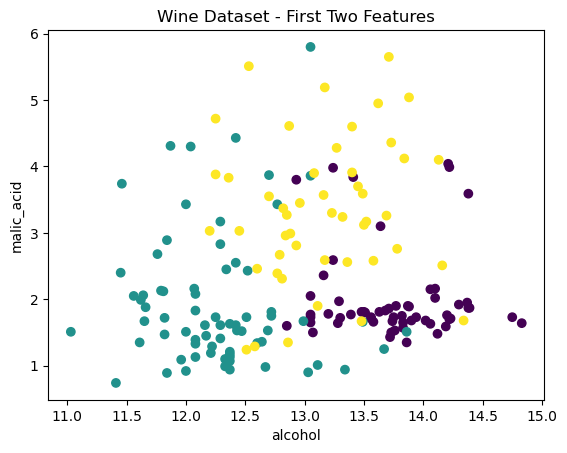

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#1 데이터 로드 
wine_data = load_wine()
print(wine_data.DESCR)

x=wine_data.data
y=wine_data.target

#2. 데이터 구조 분석
print(wine_data.data.shape)
print(wine_data.target.shape)

#3. 특성 타겟 이름 확인  
print(f'wine 데이터 feature_name : {wine_data.feature_names}')
print(f'wine 데이터 target_names : {wine_data.target_names}')

#4. 데이터 시각화 

plt.scatter(wine_data.data[:, 0], wine_data.data[:, 1], c=wine_data.target)
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])
plt.title('Wine Dataset - First Two Features')
plt.show()

#6. 데이터 셋 분할
X_train, X_test, y_train, y_test  \
= train_test_split(wine_data.data, wine_data.target, test_size=0.3, random_state=42)


In [12]:
# 훈련 데이터의 기술통계를 확인
print('Training set description:\n', pd.DataFrame(X_train).describe())

# 훈련 데이터셋의 특성들을 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 문제에 적합한 모델(로지스틱 회귀)을 선택하고 훈련
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 모델의 성능을 교차 검증을 통해 평가
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', scores)

# 테스트 데이터셋에 대해 모델을 평가
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# 랜덤 포레스트 모델로도 동일한 과정을 수행
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 랜덤 포레스트 모델의 성능을 교차 검증을 통해 평가
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print('Random Forest Cross-validation scores:', rf_scores)

# 테스트 데이터셋에 대해 랜덤 포레스트 모델을 평가
rf_y_pred = rf_model.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print('Random Forest Confusion Matrix:\n', rf_conf_matrix)
print('Random Forest Classification Report:\n', rf_class_report)

Training set description:
                0           1           2           3           4           5   \
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000   
mean    12.963306    2.402984    2.366613   19.500000  100.879032    2.273306   
std      0.841487    1.102317    0.271924    3.484134   15.367367    0.653762   
min     11.030000    0.890000    1.360000   10.600000   70.000000    0.980000   
25%     12.290000    1.640000    2.217500   17.350000   88.000000    1.695000   
50%     12.945000    1.900000    2.360000   19.500000   98.000000    2.250000   
75%     13.695000    3.170000    2.522500   21.500000  108.500000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

               6           7           8           9           10          11  \
count  124.000000  124.000000  124.000000  124.000000  124.000000  124.000000   
mean     2.007339    0.364194    1.592984    4.974032    0.959323    2.600323   
